# Kruskal’s Algorithm

The content of the following notebook is based on [this R course](https://web.archive.org/web/20141114045919/http://www.stats.ox.ac.uk/~konis/Rcourse/exercise1.pdf) and [Hage et al. (1996) paper](./hage1996.pdf).

### Introduction: Similarity of Polynesian islands

In 1938 Burrows published the results of an extensive archaeological analysis of Polynesian
islands. By examining cultural traits and complexes including artifacts (tools, canoe types,
bark cloth, etc.), aspects of social organization (languages, kinship practices), and religious
ideas, he identified 4 subgroups in Polynesia.

- Western Polynesia (Samoa, Tonga)
- Central Polynesia (Society Islands, Tuamotus, Southern Cooks, Australs, Rapa, Hawaii)
- Marginal Polynesia (New Zealand, Easter Island, Marqueses, Mangareva)
- Intermediate Polynesia (Northern Cooks)

In 1992 Irwin proposed that the level of similarity between Polynesian cultures is proportional
to the ease of travel between them. In other words, the more remote two islands are, the less
similar their cultures. 

Below you can find the Irwin's close proximity analysis of the mutual accessibility network of Polynesian islands.


![](./irving_map.png)

In support of the hypothesis that accessibility is predictive of patterns of cultural similarity, Irwin
notes parallels between his close proximity network and the subgroupings in Polynesia identified
by Burrows (1938). Unfortunately, the Irvin's network contains many superfluous edges and hence cycles which tend to obscure such parallels.

### Task 1: Implement Maximum Weight Spanning Tree

**The assignment is to test Irwin’s hypothesis by computing a maximum weight spanning tree
for the accessibility of these 13 islands.**

The following matrix gives the mutual accessibility (as computed by
Irwin) between the islands in the study.

In [6]:
header = ['TON', 'SAM', 'SCK', 'NCK', 'SOC', 'MRQ', 'TUA', 'MGR', 'AUS', 'RAP', 'HAW', 'EAS', 'NZ']

matrix = [
    [0, 0.44, 0.32, 0.18, 0.22, 0.18, 0.24, 0.09, 0.16, 0.10, 0.11, 0.03, 0.23],
    [0.44, 0, 0.27, 0.23, 0.17, 0.15, 0.17, 0.10, 0.19, 0.11, 0.19, 0.05, 0.24],
    [0.32, 0.27, 0,  0.23, 0.54, 0.30, 0.46, 0.14, 0.38, 0.18, 0.15, 0.08, 0.24],
    [0.18, 0.23, 0.23, 0,  0.23, 0.15, 0.21, 0.11, 0.18, 0.14, 0.11, 0.05, 0.10],
    [0.22, 0.17, 0.54, 0.23, 0, 0.41, 0.98, 0.22, 0.71, 0.21, 0.20, 0.09, 0.20],
    [0.18, 0.15, 0.30, 0.15, 0.41, 0, 0.54, 0.20, 0.34, 0.15, 0.13, 0.10, 0.12],
    [0.24, 0.17, 0.46, 0.21, 0.98, 0.54, 0, 0.34, 0.63, 0.21, 0.21, 0.11, 0.24],
    [0.09, 0.10, 0.14, 0.11, 0.22, 0.20, 0.34, 0, 0.23, 0.21, 0.08, 0.14, 0.08],
    [0.16, 0.19, 0.38, 0.18, 0.71, 0.34, 0.63, 0.23, 0, 0.33, 0.19, 0.06, 0.21],
    [0.10, 0.11, 0.18, 0.14, 0.21, 0.15, 0.21, 0.21, 0.33, 0, 0.05, 0.10, 0.09],
    [0.11, 0.19, 0.15, 0.11, 0.20, 0.13, 0.21, 0.08, 0.19, 0.05, 0,  0.03, 0.09],
    [0.03, 0.05, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.06, 0.10, 0.03, 0, 0.00],
    [0.23, 0.24, 0.24, 0.10, 0.20, 0.12, 0.24, 0.08, 0.21, 0.09, 0.09, 0.00, 0]
]


In [7]:
from collections import namedtuple

Edge = namedtuple('Edge', ['weight', 'island1', 'island2'])

def matrix_to_edges(header, matrix):
    G = []
    for i, row in enumerate(matrix):
        for j, weight in enumerate(row):
            if weight != 0 or i == j:
                island1 = header[i]
                island2 = header[j]
                G.append(Edge(weight=weight, island1=island1, island2=island2))
    return G

G = matrix_to_edges(header, matrix)

One method for computing the maximum weight spanning tree of a network G – due to Kruskal
– can be summarized as follows.

1. Sort the edges of $G$ into decreasing order by weight. Let $T$ be the set of edges comprising the maximum weight spanning tree. Set $T = ∅$.
2. Add the first edge to $T$.
3. Add the next edge to $T$ if and only if it does not form a cycle in $T$. If there are no remaining edges exit and report $G$ to be disconnected.
4. If $T$ has $n−1$ edges (where $n$ is the number of vertices in $G$) stop and output $T$. Otherwise go to step 3.

In [8]:

# We'll use a named tuple to represent edges
Edge = namedtuple('Edge', ['weight', 'island1', 'island2'])

def kruskal(edges, num_vertices):
    # Sort the edges by weight
    edges.sort(key=lambda edge: edge.weight, reverse=True)
    
    # Create a list to hold the forest of trees that we'll create
    forest = []
    for island in header:
        # Initially, each vertex is in its own tree
        forest.append([island])

        # Initialize an empty list to hold the edges in the minimum spanning tree
    mst = []
    
    # Keep track of the number of edges we've added to the MST
    num_edges_in_mst = 0
    for edge in edges:
        # Find the trees that the vertices of this edge belong to
        island1_tree = None
        island2_tree = None
        for tree in forest:
            if edge.island1 in tree:
                island1_tree = tree
            if edge.island2 in tree:
                island2_tree = tree

        # If the vertices are in the same trees, then adding this edge
        # would create a cycle. 
        if island1_tree != island2_tree:
            # Add the edge to the minimum spanning tree
            mst.append(edge)
            num_edges_in_mst += 1
            
            # Merge the two trees into a single tree
            island1_tree.extend(island2_tree)
            forest.remove(island2_tree)
            
        
        # If we've added n-1 edges, then we have a minimum spanning tree
        if num_edges_in_mst == num_vertices - 1:
            break
    
    return mst

# Example usage

mst = kruskal(G, len(header))
mst

[Edge(weight=0.98, island1='SOC', island2='TUA'),
 Edge(weight=0.71, island1='SOC', island2='AUS'),
 Edge(weight=0.54, island1='SCK', island2='SOC'),
 Edge(weight=0.54, island1='MRQ', island2='TUA'),
 Edge(weight=0.44, island1='TON', island2='SAM'),
 Edge(weight=0.34, island1='TUA', island2='MGR'),
 Edge(weight=0.33, island1='AUS', island2='RAP'),
 Edge(weight=0.32, island1='TON', island2='SCK'),
 Edge(weight=0.24, island1='SAM', island2='NZ'),
 Edge(weight=0.23, island1='SAM', island2='NCK'),
 Edge(weight=0.21, island1='TUA', island2='HAW'),
 Edge(weight=0.14, island1='MGR', island2='EAS')]

### Task 2
Draw the maximum weight spanning tree. Use dashed lines for the $k$ edges with the smallest weights (where $k$ is a number you pick) to emphasize the clusters. You can use the coordinates given below to plot the islands in their geographical distance.

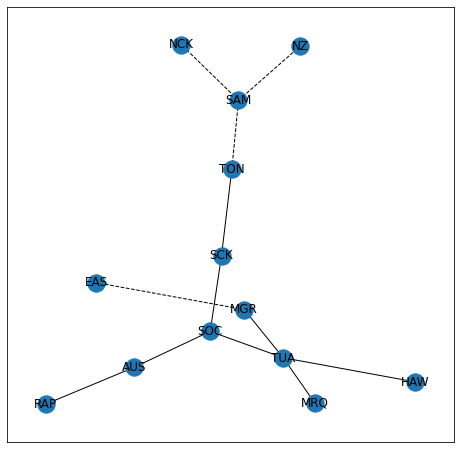

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for edge in mst:
  G.add_node(edge.island1)
  G.add_node(edge.island2)

for edge in mst:
  G.add_edge(edge.island1, edge.island2, weight=edge.weight)

edges_sorted = sorted(mst, key=lambda x: x.weight)

k=4
k_smallest_edges = edges_sorted[:k]
k_smallest_edges = [(edge.island1, edge.island2) for edge in k_smallest_edges]

plt.figure(figsize=(8,8))

# get a list of all the edges
all_edges = list(G.edges)

# create a list of tuples, where each tuple consists of two nodes and a string specifying the style
edge_styles = ['solid' for u, v in all_edges if (u, v) not in k_smallest_edges] + ['dashed' for u, v in k_smallest_edges]

# use the edge_styles list to specify the style of each edge when drawing the graph
nx.draw_networkx(G, with_labels=True, edgelist=all_edges, style=edge_styles)

plt.show()

If you want you can use the following coordinates and plot the results on a map.

In [10]:
locations = [
  (-21.13, -175.20, "Tonga"),
  (-13.83, -171.83, "Samoa"),
  (-21.33, -160.27, "South Cook"),
  (-10.88, -165.82, "North Cook"),
  (-17.67, -149.50, "Society"),
  (-8.89, -140.13, "Marquesas"),
  (-15.08, -145.87, "Tuamotu"),
  (-23.12, -134.97, "Mangareva"),
  (-23.38, -149.45, "Australs"),
  (-27.58, -144.33, "Rapa"),
  (19.52, -155.51, "Hawaii"),
  (-27.12, -109.37, "Easter"),
  (-41.35, 175.02, "New Zealand")
]

### Task 3
Compare the implied clusters with those given in Burrows’ study. Additionally, compare your results to Figure 3 in the Hage et al. paper. What are the differences? Is your clutering in agreement with what Burrows suggested?

Sieć jest podobna do sieci, która znaujduje się w artykule hage 1996.

Różnice:
NZ jest połączone z SAM zamist SCK.

Sieć wydaje się zupełnie nie podobna do tej w Burrows.